In [1]:
import yfinance as yf
import pandas as pd
import numpy as np

In [2]:
sp500 =yf.Ticker('^GSPC')
sp500=sp500.history(period='max')
sp500.to_csv("sp500.csv")

sp500.index = pd.to_datetime(sp500.index)

# Ticker create the object for s&p 500 identified by ticker symbols ^GSPC

In [3]:
sp500

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,0.0,0.0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,0.0,0.0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,0.0,0.0
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
...,...,...,...,...,...,...,...
2024-06-07 00:00:00-04:00,5343.810059,5375.080078,5331.330078,5346.990234,3692760000,0.0,0.0
2024-06-10 00:00:00-04:00,5341.220215,5365.790039,5331.520020,5360.790039,3622280000,0.0,0.0
2024-06-11 00:00:00-04:00,5353.000000,5375.950195,5327.250000,5375.319824,3568030000,0.0,0.0


In [4]:
sp500.index

DatetimeIndex(['1927-12-30 00:00:00-05:00', '1928-01-03 00:00:00-05:00',
               '1928-01-04 00:00:00-05:00', '1928-01-05 00:00:00-05:00',
               '1928-01-06 00:00:00-05:00', '1928-01-09 00:00:00-05:00',
               '1928-01-10 00:00:00-05:00', '1928-01-11 00:00:00-05:00',
               '1928-01-12 00:00:00-05:00', '1928-01-13 00:00:00-05:00',
               ...
               '2024-05-31 00:00:00-04:00', '2024-06-03 00:00:00-04:00',
               '2024-06-04 00:00:00-04:00', '2024-06-05 00:00:00-04:00',
               '2024-06-06 00:00:00-04:00', '2024-06-07 00:00:00-04:00',
               '2024-06-10 00:00:00-04:00', '2024-06-11 00:00:00-04:00',
               '2024-06-12 00:00:00-04:00', '2024-06-13 00:00:00-04:00'],
              dtype='datetime64[ns, America/New_York]', name='Date', length=24229, freq=None)

In [5]:
#cleaning & visualizing the data

<Axes: xlabel='Date'>

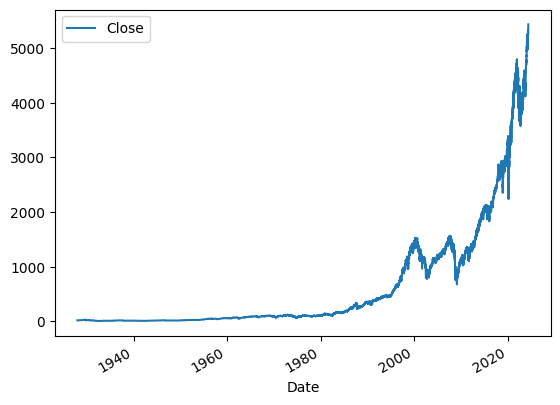

In [6]:
sp500.plot.line(y="Close", use_index=True)

In [7]:
del sp500['Dividends']
del sp500['Stock Splits']

#this columns can be useful in individual's stock calculation so it is unnecessary in this one 

In [8]:
#setting up  our target for prediction

#now we create the tomorrow column by using the shift operator 

sp500["tomorrow"] = sp500["Close"].shift(-1)

In [9]:
sp500

# so we add the second day closing price to 1st day on the tomorrow column

,Open,High,Low,Close,Volume,tomorrow
Date,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.760000
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,17.719999
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,17.549999
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,17.660000
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.500000
...,...,...,...,...,...,...
2024-06-07 00:00:00-04:00,5343.810059,5375.080078,5331.330078,5346.990234,3692760000,5360.790039
2024-06-10 00:00:00-04:00,5341.220215,5365.790039,5331.520020,5360.790039,3622280000,5375.319824
2024-06-11 00:00:00-04:00,5353.000000,5375.950195,5327.250000,5375.319824,3568030000,5421.029785


In [10]:
# Now we need to now the tomorrow price is greater than today, so we are going to create target column 
#which going to create boolean value

sp500["Target"] = (sp500["tomorrow"] > sp500["Close"]).astype(int)

In [11]:
sp500 = sp500.loc["1990-01-01":].copy()
#Reduce the data since too much historical data lead upto different market behaviours.

In [12]:
sp500

,Open,High,Low,Close,Volume,tomorrow,Target
Date,,,,,,,
1990-01-02 00:00:00-05:00,353.399994,359.690002,351.980011,359.690002,162070000,358.760010,0
1990-01-03 00:00:00-05:00,359.690002,360.589996,357.890015,358.760010,192330000,355.670013,0
1990-01-04 00:00:00-05:00,358.760010,358.760010,352.890015,355.670013,177000000,352.200012,0
1990-01-05 00:00:00-05:00,355.670013,355.670013,351.350006,352.200012,158530000,353.790009,1
1990-01-08 00:00:00-05:00,352.200012,354.239990,350.540009,353.790009,140110000,349.619995,0
...,...,...,...,...,...,...,...
2024-06-07 00:00:00-04:00,5343.810059,5375.080078,5331.330078,5346.990234,3692760000,5360.790039,1
2024-06-10 00:00:00-04:00,5341.220215,5365.790039,5331.520020,5360.790039,3622280000,5375.319824,1
2024-06-11 00:00:00-04:00,5353.000000,5375.950195,5327.250000,5375.319824,3568030000,5421.029785,1


In [13]:
# Train the model

In [14]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, min_samples_split=100, random_state=1)

In [15]:
# Train & test data split

In [16]:
train=sp500.iloc[:-300]
test=sp500.iloc[-300:]

predictors = ["Close","Volume","Open","High","Low"]
model.fit(train[predictors],train["Target"])

RandomForestClassifier(min_samples_split=100, random_state=1)

In [17]:
from sklearn.metrics import precision_score
preds = model.predict(test[predictors])

In [18]:
preds

array([0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [19]:
preds = pd.Series(preds, index=test.index)
precision_score(test["Target"], preds)

0.5447154471544715

In [20]:
combined = pd.concat([test["Target"], preds], axis=1)

<Axes: xlabel='Date'>

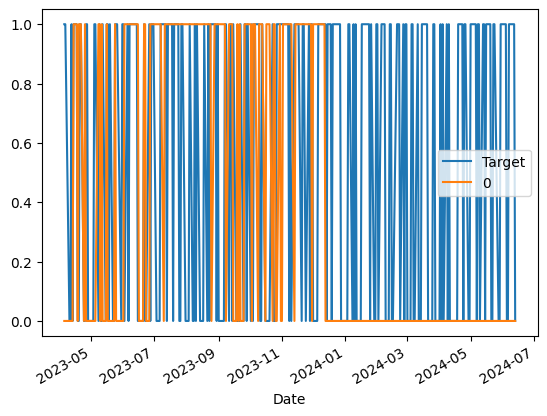

In [21]:
combined.plot()

In [22]:
# Backtracking to check the model performance

In [23]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict(test[predictors])
    preds = pd.Series(preds, index=test.index, name="Prediction")
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined

In [24]:
def backtest(data, model, predictors, start=2500, step=250):
    all_prediction = []
    
    for i in range(start, data.shape[0], step):
        train = data.iloc[0:i].copy()
        test = data.iloc[i:i+step].copy()
        prediction = predict(train, test, predictors, model)
        all_prediction.append(prediction)
    return pd.concat(all_prediction)

In [25]:
predictions = backtest(sp500,model,predictors)

In [26]:
predictions["Prediction"].value_counts()

Prediction
0    3583
1    2596
Name: count, dtype: int64

In [27]:
precision_score(predictions["Target"], predictions["Prediction"])

0.5288906009244992

In [28]:
predictions["Target"].value_counts() / predictions.shape[0]

Target
1    0.535038
0    0.464962
Name: count, dtype: float64

In [29]:
# ADDING ADDITIONAL PREDICTORS TO THE MODEL

In [30]:
horizons = [2,5,60,250,1000]  # just we calculate in 2 days, one week, 3 months we can see the closing price today and 2 days before, 5 days before, 3 months before to predict the future trends

new_predictor = []
for horizon in horizons:
    rolling_average = sp500.rolling(horizon).mean()
    
    ratio_column = f"close_ratio_{horizon}"
    sp500[ratio_column] = sp500["Close"] / rolling_average["Close"]
    
    trend_column = f"Trend_{horizon}"
    sp500[trend_column] = sp500.shift(1).rolling(horizon).sum()["Target"]
    
    new_predictor += [ratio_column, trend_column]

In [31]:
sp500

,Open,High,Low,Close,Volume,tomorrow,Target,close_ratio_2,Trend_2,close_ratio_5,Trend_5,close_ratio_60,Trend_60,close_ratio_250,Trend_250,close_ratio_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,
1990-01-02 00:00:00-05:00,353.399994,359.690002,351.980011,359.690002,162070000,358.760010,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-03 00:00:00-05:00,359.690002,360.589996,357.890015,358.760010,192330000,355.670013,0,0.998706,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-04 00:00:00-05:00,358.760010,358.760010,352.890015,355.670013,177000000,352.200012,0,0.995675,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-05 00:00:00-05:00,355.670013,355.670013,351.350006,352.200012,158530000,353.790009,1,0.995098,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-08 00:00:00-05:00,352.200012,354.239990,350.540009,353.790009,140110000,349.619995,0,1.002252,1.0,0.993731,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-06-07 00:00:00-04:00,5343.810059,5375.080078,5331.330078,5346.990234,3692760000,5360.790039,1,0.999442,0.0,1.003989,3.0,1.029921,32.0,1.130627,139.0,1.272156,530.0
2024-06-10 00:00:00-04:00,5341.220215,5365.790039,5331.520020,5360.790039,3622280000,5375.319824,1,1.001289,1.0,1.003664,3.0,1.031883,33.0,1.132566,139.0,1.274758,530.0
2024-06-11 00:00:00-04:00,5353.000000,5375.950195,5327.250000,5375.319824,3568030000,5421.029785,1,1.001353,2.0,1.003229,3.0,1.033823,34.0,1.134670,139.0,1.277522,531.0


In [32]:
sp500 = sp500.dropna()

In [33]:
sp500

,Open,High,Low,Close,Volume,tomorrow,Target,close_ratio_2,Trend_2,close_ratio_5,Trend_5,close_ratio_60,Trend_60,close_ratio_250,Trend_250,close_ratio_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,
1993-12-14 00:00:00-05:00,465.730011,466.119995,462.459991,463.059998,275050000,461.839996,0,0.997157,1.0,0.996617,1.0,1.000283,32.0,1.028047,127.0,1.176082,512.0
1993-12-15 00:00:00-05:00,463.059998,463.690002,461.839996,461.839996,331770000,463.339996,1,0.998681,0.0,0.995899,1.0,0.997329,32.0,1.025151,126.0,1.172676,512.0
1993-12-16 00:00:00-05:00,461.859985,463.980011,461.859985,463.339996,284620000,466.380005,1,1.001621,1.0,0.999495,2.0,1.000311,32.0,1.028274,127.0,1.176163,513.0
1993-12-17 00:00:00-05:00,463.339996,466.380005,463.339996,466.380005,363750000,465.850006,0,1.003270,2.0,1.004991,3.0,1.006561,32.0,1.034781,128.0,1.183537,514.0
1993-12-20 00:00:00-05:00,466.380005,466.899994,465.529999,465.850006,255900000,465.299988,0,0.999431,1.0,1.003784,2.0,1.005120,32.0,1.033359,128.0,1.181856,513.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-06-06 00:00:00-04:00,5357.799805,5362.350098,5335.359863,5352.959961,3609990000,5346.990234,0,0.999900,1.0,1.007740,4.0,1.031673,32.0,1.132893,140.0,1.274254,530.0
2024-06-07 00:00:00-04:00,5343.810059,5375.080078,5331.330078,5346.990234,3692760000,5360.790039,1,0.999442,0.0,1.003989,3.0,1.029921,32.0,1.130627,139.0,1.272156,530.0
2024-06-10 00:00:00-04:00,5341.220215,5365.790039,5331.520020,5360.790039,3622280000,5375.319824,1,1.001289,1.0,1.003664,3.0,1.031883,33.0,1.132566,139.0,1.274758,530.0


In [34]:
# let's add the new_predictor and check out model performance

In [35]:
model = RandomForestClassifier(n_estimators=200, min_samples_split=50, random_state=1)

In [36]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict_proba(test[predictors])[:,1]
    preds[preds >= 0.6] = 1
    preds[preds < 0.6] = 0
    preds = pd.Series(preds, index=test.index, name="Prediction")
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined

In [37]:
# pass the new_predictor because the previous predictors are not super informative to the model since there just numbers, whereas new_predictors provides trends of previous dates data which helps the model in predicting the stock prices

In [38]:
predictions = backtest(sp500,model,new_predictor)

In [39]:
predictions["Prediction"].value_counts()

Prediction
0.0    4342
1.0     836
Name: count, dtype: int64

In [40]:
precision_score(predictions["Target"], predictions["Prediction"])

0.5741626794258373

In [41]:
# Upto this model is ready, but you can't use this model to investment in the stock since it's just a simple machine learning model. so you can use this model for learning purpose.